# Required assignment 22.1: Conducting a hierarchical clustering analysis

In this module, you learned about clustering, which is the process of grouping objects based on their similarities. Clustering helps identify natural groupings within unlabelled data. Different clustering algorithms make various assumptions about what makes data points similar, so each algorithm may produce different but valid groupings.

For example, if you build a fruit classifier using labelled data, it will identify specific fruits such as `orange` or `apple` by learning from examples with those labels. In contrast, clustering uses unsupervised learning, meaning it works with many examples but without any labels. A clustering algorithm might group fruits into clusters such as `fruits with soft skin and many dimples` or `fruits with shiny, hard skin` based solely on their features, without knowing the actual fruit names.

This assignment will help you apply clustering machine learning algorithms using Python packages. The Jupyter Notebook includes Python concepts, step-by-step instructions and starter code to guide you through the tasks. Make sure to run each code cell before submitting your work. After completing the assignment, compare your results with the provided solution to evaluate your understanding.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pylab as pl

### Hierarchical clustering
    

Hierarchical clustering, also called hierarchical cluster analysis, is an algorithm that organises objects into groups called clusters based on their similarity. The final result is a set of clusters where each cluster is distinct from the others, and the objects within each cluster are generally similar to one another.

#### How hierarchical clustering works
Hierarchical clustering begins by treating each data point as its own individual cluster. Then, it repeatedly performs two steps:

(1) Find the two clusters that are closest or most similar to each other.

(2) Merge these two clusters into one.

This process continues iteratively until all data points are grouped into a single cluster or until a stopping criterion is reached.


Hierarchical clustering produces a dendrogram, which is a tree-like diagram that shows how clusters are merged based on their distances. In wholesale customer segmentation, the choice of distance metrics and linkage criteria should reflect customers' purchasing behaviour, such as their annual spending across product categories. The clustering process starts with each customer as an individual cluster and merges the most similar clusters step by step. To determine the number of clusters, a threshold is set by cutting the dendrogram horizontally, and the number of vertical lines intersected by this cut indicates the final number of clusters.



###  A simple example of hierarchical clustering

After understanding what the basic steps of hierarchical clustering are, it's now time to walk through a simple example to test your knowledge.

You will be working on a wholesale customer segmentation problem. You can download the data set using [this](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv) link. The data are hosted on the UCI Machine Learning repository.

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories such as milk, grocery, region, etc.



### Question 1:
Load the data set, `Wholesale customers data.csv` by using the `read_csv()` function from the pandas module, which you imported earlier as `pd`. Assign the dataframe to the variable `data`.

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()

# Load the dataset
data = pd.read_csv("data/Wholesale customers data.csv")

import os
os.getcwd()
import os
os.listdir()


['Required_assignment_22_1.ipynb', '.ipynb_checkpoints', 'data']

Run the code cell below to visualise the first 10 rows of the dataframe.

In [8]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


There are multiple product categories – fresh, milk, grocery, etc. The values represent the number of units purchased by each client for each product.

Your aim is to separate or cluster the data into segments of similar clients. Of course, hierarchical clustering seems to be the right strategy to solve this problem.


### Question 2:
Complete the code cell below by normalising the `data`  dataframe using the normalise function you imported earlier. Assign the normalised data to the `data_scaled` variable.

Next, instantiate a new `pandas` dataframe by using the `DataFrame` class and passing in `data_scaled`. Save it to the same `data_scaled` variable.
For convenience, set the parameter `columns = data.columns` to keep the original column names.

In [9]:
###GRADED CELL
data_scaled = None

# YOUR CODE HERE
#raise NotImplementedError()

# Normalize the data
data_scaled = normalize(data)

# Convert back to a pandas DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

print(data_scaled.head(10))


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   
5  0.000146  0.000218  0.684944  0.600972  0.372997  0.048462   
6  0.000136  0.000204  0.824476  0.217508  0.474247  0.032636   
7  0.000145  0.000217  0.548036  0.358368  0.681593  0.120685   
8  0.000105  0.000315  0.625457  0.382637  0.649477  0.044578   
9  0.000083  0.000125  0.250143  0.462010  0.786371  0.048271   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294  
5          0.130615    0.105583  
6          0.213496    0.037056  
7          0

### Question 3:
Draw the dendrogram to decide the number of clusters for this particular problem. Assign the output to `dend`.  Use `method='ward'` in the linkage method used.

Note: to draw the dendrogram, you'll use the `dendrogram` function from `scipy.cluster.hierarchy` module, which you imported earlier as `shc`.

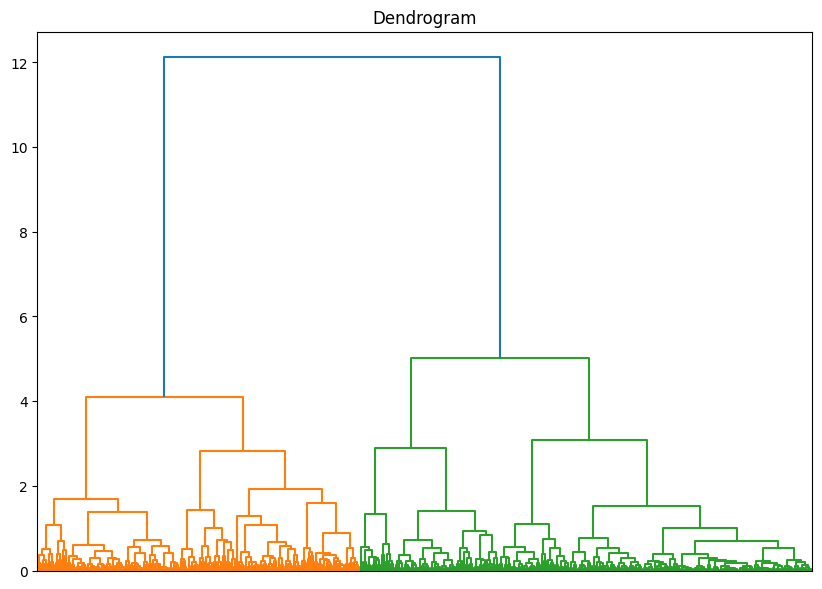

In [10]:
###GRADED CELL
dend = None
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")

# YOUR CODE HERE
#raise NotImplementedError()
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


The x-axis contains the samples, and the y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line, therefore you can decide on a threshold of 6 and cut the dendrogram.

Run the code cell below to visualise the dendrogram with the threshold line.

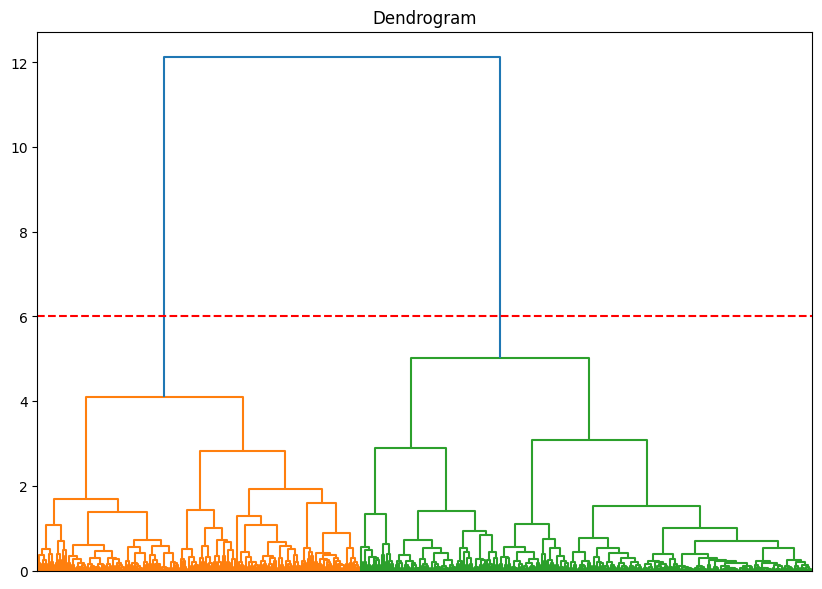

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

### Question 4:
How many clusters do you have at this point?


A. Two clusters

B. Three clusters

C. Four clusters

Set the value of `ans4` to 'A', 'B' or 'C' depending on your answer. 


In [12]:
### GRADED CELL
ans4 = None

# YOUR CODE HERE
#raise NotImplementedError()
ans4 = 'A'

You can now use the `AgglomerativeClustering()` from `scikit-learn` to apply hierarchical clustering for two clusters. The documentation about this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

### Question 5:
Complete the code cell below by instantiating an `AgglomerativeClustering` class with the following parameters and assigning it to the cluster variable.
    
- `n_clusters = 2`
- `metric='euclidean'`
- `linkage='ward'`

Finally, pass the `data_scaled` dataframe into the `fit_predict()` method to see the clustered data.

In [13]:
###GRADED CELL
cluster = None

# YOUR CODE HERE
#raise NotImplementedError()

cluster = AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',
    linkage='ward'
)

cluster_labels = cluster.fit_predict(data_scaled)


### Question 6:
Why do you only see values of 0s and 1s in the clustering output?

A. Because the clustering algorithm used only supports binary classification.

B. Because the data set contains only two features.

C. Because the clustering result assigns each data point to one of two clusters.

D. Because the dendrogram was plotted incorrectly.

Set the value of `ans6` to 'A', 'B',  'C' or 'D' depending on your answer.

In [14]:
### GRADED CELL
ans6 = None

# YOUR CODE HERE
#raise NotImplementedError()

ans6 = 'C'


Now visualise the two clusters:

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)
plt.xlabel('Milk')
plt.ylabel('Grocery')

Awesome! As expected, you can clearly visualise the two clusters.